In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)

In [ ]:
df = df.to_numpy()

#Preprocesamiento de datos Mnist

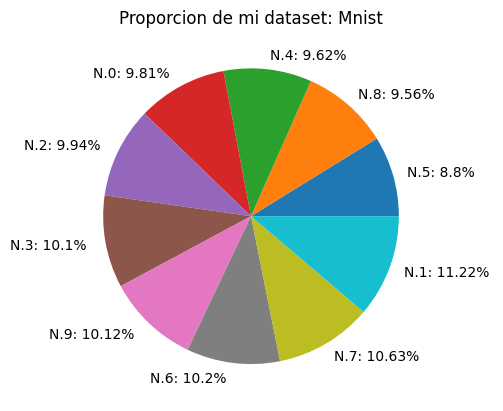

In [ ]:
X = df[:,1:]
y = df[:,0]

clases, cantidades = np.unique(y,return_counts=True)

cantidades_ind = np.argsort(cantidades)
total = sum(cantidades)
#print(clases[cantidades_ind])
lab_tex = [f'N.{clases[cantidades_ind[ind]]}: {round(var*100/total,2)}% ' for ind, var in enumerate(cantidades[cantidades_ind])]
plt.pie(cantidades[cantidades_ind], labels=lab_tex)
plt.title('Proporcion de mi dataset: Mnist')
plt.show()

#Visualizacion de un ejemplo del data set

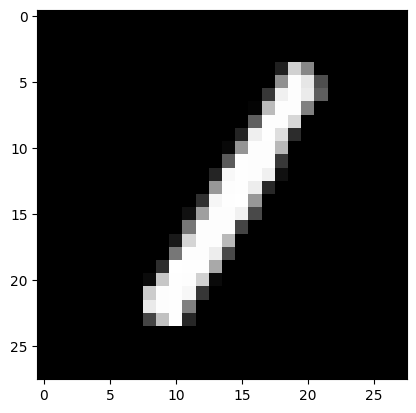

In [ ]:
plt.imshow(X[y==1,:][2].reshape((28,28)), cmap='gray')
plt.show()

In [ ]:
X_i = X[y==0]
X_i.shape[0]

1962

#LDA-Fisher

In [ ]:
#Funcion para calcular la media de cada clase
def calcular_media(X,y,clase):
  return np.mean(X[y==clase],axis=0)
#Funcion para calcular la matriz de dispersion dentro de cada clase
def calcular_Sw(X,y):
  Sw = np.zeros((X.shape[1],X.shape[1]))
  for ind in np.unique(y):
    X_i = X[y==ind]
    Sw += np.cov(X_i.T) + np.eye(X.shape[1])*1e-8 # Esto no siempre es posible.
  return Sw

#Funcion para calcular la matriz de dispersion total.
def calcular_Sb(X):
  return np.cov(X.T)

#Funcion para calcular la matriz de proyeccion óptima.
def calcular_matriz_proyeccion(Sw,Sb):
  eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
  idx = eigvals.argsort()[::-1]
  eigvecs = eigvecs[:,idx]
  return eigvecs

#Funcion para tranformar los datos utilizando la matriz de proyeccion optima.
def transformar_datos(X, matriz_proyeccion):
  return X.dot(matriz_proyeccion)

In [ ]:
#Calcular la matriz de dispersion dentro de cada clase.
Sw = calcular_Sw(X,y)
Sb = calcular_Sb(X) - Sw
#matriz de dispersion.
matriz_proyeccion = calcular_matriz_proyeccion(Sw,Sb)

In [ ]:
X_lda = transformar_datos(X,matriz_proyeccion)

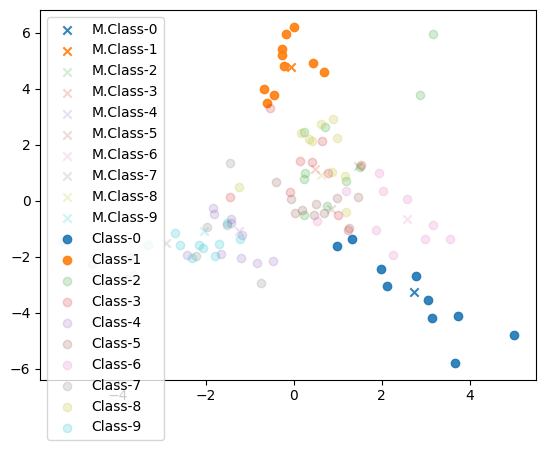

In [ ]:
select = [0,1] #list(range(10))#
LDA_comp_0,LDA_comp_1 = 0,1
#Media de las clases
for num in range(0,10):
  media_clase0 = calcular_media(X, y, num)
  media_clase0_lda = transformar_datos(media_clase0, matriz_proyeccion)
  if num not in select:
    plt.scatter([media_clase0_lda[LDA_comp_0].real],[media_clase0_lda[LDA_comp_1].real],
                label=f'M.Class-{num}' ,marker='x',
                #color='black',
                alpha=.2)
  else:
    plt.scatter([media_clase0_lda[LDA_comp_0].real],[media_clase0_lda[LDA_comp_1].real],
                label=f'M.Class-{num}' ,marker='x',
                #color='black',
                alpha=.9)
#Valores de cada clase
for num in range(0,10):
  if num not in select:
    plt.scatter(X_lda[y==num,LDA_comp_0][:10].real,X_lda[y==num,LDA_comp_1][:10].real, label=f'Class-{num}',alpha=.2)

  elif num in select:
    plt.scatter(X_lda[y==num,LDA_comp_0][:10].real,X_lda[y==num,LDA_comp_1][:10].real, label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()